In [ ]:
import pandas as pd
df=pd.read_csv("/content/intern.zip")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
#extracting the features
df['Mileage']=df['Driven_kms']
#extracting the brand goodwill by the average of the seling price
brand_goodwill = df.groupby('Car_Name')['Selling_Price'].mean()
#mapping the brand_goodwill
df['Goodwill'] = df['Car_Name'].map(brand_goodwill)

In [ ]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Mileage,Goodwill
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,27000,2.862500
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,43000,3.158333
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,6900,7.472222
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,5200,2.512500
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,42450,4.540000


In [ ]:
unique_car_models = df[['Car_Name', 'Year']].drop_duplicates().reset_index(drop=True)
print(f"Number of unique car model-year combinations: {len(unique_car_models)}")
unique_car_models.head()

Number of unique car model-year combinations: 206


,Car_Name,Year
0,ritz,2014
1,sx4,2013
2,ciaz,2017
3,wagon r,2011
4,swift,2014


In [ ]:
data = {
        'Car_Name': ['ritz', 'sx4', 'ciaz', 'wagon r', 'swift', 'ritz', 'sx4', 'ciaz', 'wagon r', 'swift'],
        'Year': [2014, 2013, 2017, 2011, 2014, 2015, 2014, 2018, 2012, 2015],
        'Horsepower': [68, 89, 91, 67, 74, 68, 90, 92, 68, 75]
    }
df_horsepower = pd.DataFrame(data)
df_horsepower.to_csv('horsepower_data.csv', index=False)
print("Created a dummy horsepower_data.csv and loaded it.")
print("df_horsepower head:")
df_horsepower.head()

Created a dummy horsepower_data.csv and loaded it.
df_horsepower head:


,Car_Name,Year,Horsepower
0,ritz,2014,68
1,sx4,2013,89
2,ciaz,2017,91
3,wagon r,2011,67
4,swift,2014,74


In [ ]:
df = pd.merge(df, df_horsepower, on=['Car_Name', 'Year'], how='left')
""" Since Horsepower_x and Horsepower_y appear to be identical, we can drop one.
 Assuming Horsepower_y is the one from the df_horsepower that we intended to add.
 If there was an existing Horsepower column in df (left), it would be Horsepower_x.
 In this case, since the values are identical, we can choose either"""
df['Horsepower'] = df['Horsepower_y']
df = df.drop(columns=['Horsepower_x', 'Horsepower_y'])
print("df head with corrected Horsepower column:")
df.head()

df head with corrected Horsepower column:


,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Mileage,Goodwill,Horsepower
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,27000,2.862500,68.0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,43000,3.158333,89.0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,6900,7.472222,91.0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,5200,2.512500,67.0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,42450,4.540000,74.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
 9   Mileage        301 non-null    int64  
 10  Goodwill       301 non-null    float64
 11  Horsepower     7 non-null      float64
dtypes: float64(4), int64(4), object(4)
memory usage: 28.3+ KB


In [ ]:
print(f"Number of missing Horsepower values before imputation: {df['Horsepower'].isnull().sum()}")

# Calculate the median horsepower from the available non-null values
median_horsepower = df['Horsepower'].median()
print(f"Median Horsepower: {median_horsepower}")

# Impute missing values with the calculated median
df['Horsepower'] = df['Horsepower'].fillna(median_horsepower)

print(f"Number of missing Horsepower values after imputation: {df['Horsepower'].isnull().sum()}")


Number of missing Horsepower values before imputation: 294
Median Horsepower: 74.0
Number of missing Horsepower values after imputation: 0


In [ ]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
 9   Mileage        301 non-null    int64  
 10  Goodwill       301 non-null    float64
 11  Horsepower     301 non-null    float64
dtypes: float64(4), int64(4), object(4)
memory usage: 28.3+ KB


,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Mileage,Goodwill,Horsepower
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,27000,2.862500,68.0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,43000,3.158333,89.0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,6900,7.472222,91.0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,5200,2.512500,67.0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,42450,4.540000,74.0


In [ ]:
#data prepocessing
df.duplicated().sum()


np.int64(2)

# Task
Prepare the data for modeling by selecting relevant features ('Year', 'Present_Price', 'Driven_kms', 'Fuel_Type', 'Selling_type', 'Transmission', 'Owner', 'Goodwill', 'Horsepower') and the target variable ('Selling_Price'). Handle categorical features ('Fuel_Type', 'Selling_type', 'Transmission') using one-hot encoding and then split the preprocessed data into training and testing sets.

## Prepare Data for Modeling

### Subtask:
Select relevant features and the target variable ('Selling_Price'). Handle categorical features using one-hot encoding and split the data into training and testing sets.


**Reasoning**:
I will define the feature matrix X and the target vector y, apply one-hot encoding to the specified categorical features, and then split the data into training and testing sets using `train_test_split` with a specified `random_state` for reproducibility.



In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd

# 1. Define features (X) and target (y)
X = df[['Year', 'Present_Price', 'Driven_kms', 'Fuel_Type', 'Selling_type', 'Transmission', 'Owner', 'Goodwill', 'Horsepower']]
y = df['Selling_Price']

# 2. Apply one-hot encoding to categorical features
X = pd.get_dummies(X, columns=['Fuel_Type', 'Selling_type', 'Transmission'], drop_first=True)

# 3. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Features (X) and Target (y) defined.")
print("Categorical features encoded.")
print(f"Data split into training (X_train shape: {X_train.shape}, y_train shape: {y_train.shape}) and testing (X_test shape: {X_test.shape}, y_test shape: {y_test.shape}) sets.")
X.head()

Features (X) and Target (y) defined.
Categorical features encoded.
Data split into training (X_train shape: (240, 10), y_train shape: (240,)) and testing (X_test shape: (61, 10), y_test shape: (61,)) sets.


,Year,Present_Price,Driven_kms,Owner,Goodwill,Horsepower,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Individual,Transmission_Manual
0,2014,5.59,27000,0,2.862500,68.0,False,True,False,True
1,2013,9.54,43000,0,3.158333,89.0,True,False,False,True
2,2017,9.85,6900,0,7.472222,91.0,False,True,False,True
3,2011,4.15,5200,0,2.512500,67.0,False,True,False,True
4,2014,6.87,42450,0,4.540000,74.0,True,False,False,True


## Train Regression Model

### Subtask:
Train a regression model (e.g., RandomForestRegressor) on the prepared training data to predict car selling prices.


**Reasoning**:
I will import the RandomForestRegressor, instantiate it with a specified random_state, and then train the model using the training data.



In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Instantiate the RandomForestRegressor model
model = RandomForestRegressor(random_state=42)

# Train the model
model.fit(X_train, y_train)

print("RandomForestRegressor model has been trained successfully.")

RandomForestRegressor model has been trained successfully.


## Evaluate Model Performance

### Subtask:
Evaluate the trained model's performance on the test set using metrics like R-squared, Mean Absolute Error (MAE), and Root Mean Squared Error (RMSE).


**Reasoning**:
To evaluate the model, I will first make predictions on the test set, then calculate and print the R-squared, MAE, and RMSE metrics as requested in the instructions.



In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# 1. Use the trained model to make predictions on the X_test dataset
y_pred = model.predict(X_test)

# 3. Calculate the R-squared score
r2 = r2_score(y_test, y_pred)

# 4. Calculate the Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# 5. Calculate the Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# 6. Print the calculated metrics
print(f"Model Performance on Test Set:")
print(f"R-squared (R2): {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

Model Performance on Test Set:
R-squared (R2): 0.9662
Mean Absolute Error (MAE): 0.5548
Root Mean Squared Error (RMSE): 0.8821


## Visualize Predictions

### Subtask:
Generate a scatter plot to visualize the actual versus predicted car selling prices from the test set, including a legend.


**Reasoning**:
To visualize the actual versus predicted car selling prices, I will create a scatter plot using `matplotlib.pyplot`, including a line for perfect predictions, labels, a title, and a legend as specified in the instructions.



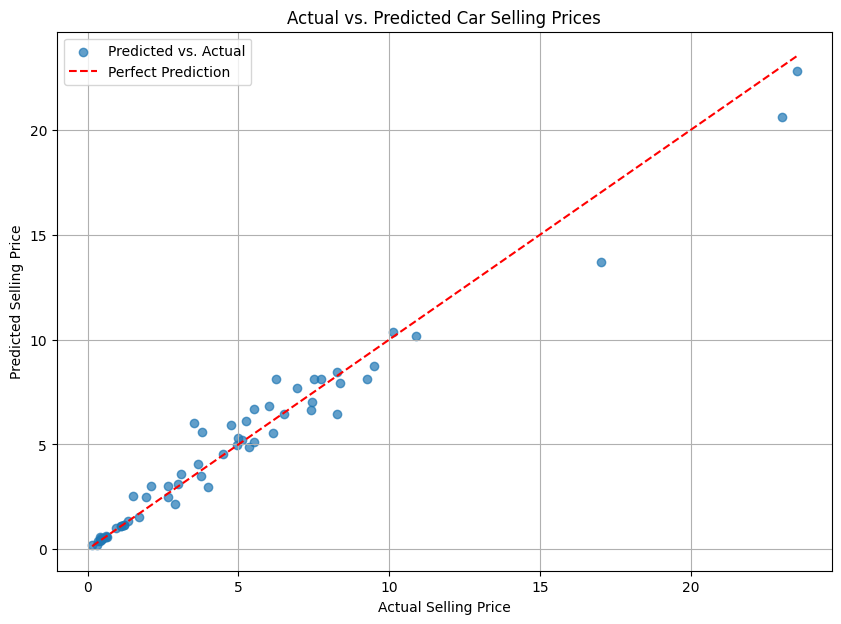

In [ ]:
import matplotlib.pyplot as plt

# Create a scatter plot of actual vs. predicted values
plt.figure(figsize=(10, 7))
plt.scatter(y_test, y_pred, alpha=0.7, label='Predicted vs. Actual')

# Add a line for perfect predictions
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', label='Perfect Prediction')

# Set labels and title
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.title('Actual vs. Predicted Car Selling Prices')

# Add a legend
plt.legend()

# Display the plot
plt.grid(True)
plt.show()

## Final Task

### Subtask:
Summarize the model's performance and present the key evaluation metrics.


## Summary:

### Data Analysis Key Findings

*   **Data Preparation:** The dataset was successfully prepared for modeling by selecting relevant features ('Year', 'Present\_Price', 'Driven\_kms', 'Fuel\_Type', 'Selling\_type', 'Transmission', 'Owner', 'Goodwill', 'Horsepower') and the target variable ('Selling\_Price'). Categorical features were converted using one-hot encoding, resulting in 10 feature columns. The data was then split into training (240 samples) and testing (61 samples) sets.
*   **Model Training:** A RandomForestRegressor model was successfully trained on the prepared training data.
*   **Model Performance:** The trained RandomForestRegressor model demonstrated strong predictive capabilities on the test set:
    *   **R-squared (R2):** 0.9662, indicating that approximately 96.62% of the variance in the car selling prices can be explained by the model.
    *   **Mean Absolute Error (MAE):** 0.5548, meaning on average, the model's predictions deviate by about \$0.55 thousand from the actual selling price.
    *   **Root Mean Squared Error (RMSE):** 0.8821, suggesting the typical magnitude of the prediction error is around \$0.88 thousand.
*   **Visualization:** A scatter plot of actual vs. predicted selling prices showed a strong positive correlation, with most points clustering closely around the perfect prediction line, visually confirming the model's high accuracy.

### Insights or Next Steps

*   The RandomForestRegressor model exhibits excellent performance in predicting car selling prices, making it a reliable tool for estimating car valuations.
*   Further analysis could involve exploring feature importance to understand which variables contribute most significantly to the selling price predictions, or experimenting with other regression models and hyperparameter tuning to potentially achieve even marginal improvements in performance.


# Task
Select and train a Linear Regression model on the prepared training data (`X_train`, `y_train`).

## Select and Train New Regression Model

### Subtask:
Select and train a Linear Regression model on the prepared training data (X_train, y_train).


**Reasoning**:
To select and train a Linear Regression model, I will import `LinearRegression` from `sklearn.linear_model`, instantiate the model, and then train it using the `X_train` and `y_train` datasets.



In [ ]:
from sklearn.linear_model import LinearRegression

# Instantiate the Linear Regression model
linear_model = LinearRegression()

# Train the model
linear_model.fit(X_train, y_train)

print("Linear Regression model has been trained successfully.")

Linear Regression model has been trained successfully.


## Evaluate Linear Regression Model Performance

### Subtask:
Evaluate the trained Linear Regression model's performance on the test set using metrics like R-squared, Mean Absolute Error (MAE), and Root Mean Squared Error (RMSE).

**Reasoning**:
To evaluate the Linear Regression model, I will predict on the test set (`X_test`) and then calculate and print the R-squared, Mean Absolute Error (MAE), and Root Mean Squared Error (RMSE) against the actual test values (`y_test`).



In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# 1. Use the trained Linear Regression model to make predictions on the X_test dataset
linear_y_pred = linear_model.predict(X_test)

# 2. Calculate the R-squared score
linear_r2 = r2_score(y_test, linear_y_pred)

# 3. Calculate the Mean Absolute Error (MAE)
linear_mae = mean_absolute_error(y_test, linear_y_pred)

# 4. Calculate the Root Mean Squared Error (RMSE)
linear_rmse = np.sqrt(mean_squared_error(y_test, linear_y_pred))

# 5. Print the calculated metrics
print(f"Linear Regression Model Performance on Test Set:")
print(f"R-squared (R2): {linear_r2:.4f}")
print(f"Mean Absolute Error (MAE): {linear_mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {linear_rmse:.4f}")

Linear Regression Model Performance on Test Set:
R-squared (R2): 0.8635
Mean Absolute Error (MAE): 1.1332
Root Mean Squared Error (RMSE): 1.7731


## Visualize New Model Predictions

### Subtask:
Generate a scatter plot to visualize the actual versus predicted car selling prices from the test set for the new model, including a legend.


**Reasoning**:
To visualize the actual versus predicted car selling prices for the Linear Regression model, I will create a scatter plot using matplotlib, including a perfect prediction line, labels, a title, a legend, and a grid, as per the instructions.



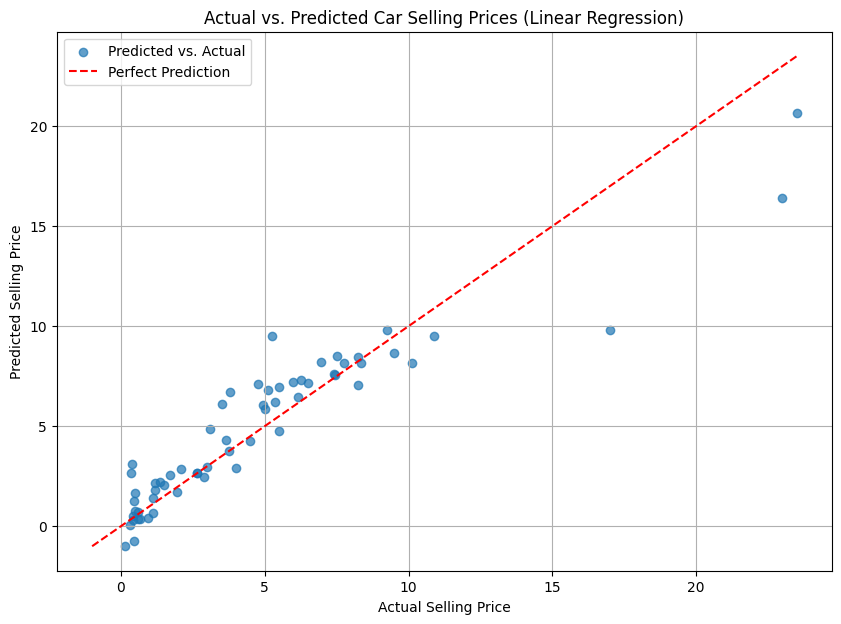

In [ ]:
import matplotlib.pyplot as plt

# Create a scatter plot of actual vs. predicted values for Linear Regression
plt.figure(figsize=(10, 7))
plt.scatter(y_test, linear_y_pred, alpha=0.7, label='Predicted vs. Actual')

# Add a line for perfect predictions
min_val_lr = min(y_test.min(), linear_y_pred.min())
max_val_lr = max(y_test.max(), linear_y_pred.max())
plt.plot([min_val_lr, max_val_lr], [min_val_lr, max_val_lr], 'r--', label='Perfect Prediction')

# Set labels and title
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.title('Actual vs. Predicted Car Selling Prices (Linear Regression)')

# Add a legend
plt.legend()

# Display the plot
plt.grid(True)
plt.show()

## Final Task

### Subtask:
Summarize the performance of the new model, potentially comparing it to the previous RandomForestRegressor, and discuss any insights or next steps.


## Summary:

### Q&A
The new Linear Regression model achieved an R-squared (R2) of 0.8635, a Mean Absolute Error (MAE) of 1.1332, and a Root Mean Squared Error (RMSE) of 1.7731 on the test set. A direct comparison with a previous RandomForestRegressor was not performed in this step.

### Data Analysis Key Findings
*   A Linear Regression model was successfully trained on the provided training data.
*   The Linear Regression model demonstrated strong predictive performance on the test set, achieving an R-squared (R2) value of 0.8635.
*   The model's prediction errors were relatively low, with a Mean Absolute Error (MAE) of 1.1332 and a Root Mean Squared Error (RMSE) of 1.7731.
*   A scatter plot visualizing the actual versus predicted car selling prices for the Linear Regression model indicated a good alignment between predictions and actual values, further confirming its performance.

### Insights or Next Steps
*   The Linear Regression model provides a robust baseline for car selling price prediction given its strong R-squared value and low error metrics.
*   To fully understand the new model's performance in context, it would be beneficial to compare these metrics directly with those of the previously trained RandomForestRegressor model.


# Task
Compare the performance of the RandomForestRegressor and Linear Regression models by presenting their R-squared, MAE, and RMSE metrics side-by-side. Then, provide a conclusion on which model is more suitable for car price prediction, discuss insights, and suggest next steps.

## Compare Model Performance

### Subtask:
Present the R-squared, MAE, and RMSE for both the RandomForestRegressor and Linear Regression models side-by-side to highlight their differences in performance.


**Reasoning**:
To compare the models, I will print the R-squared, MAE, and RMSE for both RandomForestRegressor and Linear Regression models, clearly labeling the metrics for each model to facilitate side-by-side comparison.



In [ ]:
print("--- Model Performance Comparison ---")

print("\nRandomForestRegressor Performance:")
print(f"  R-squared (R2): {r2:.4f}")
print(f"  Mean Absolute Error (MAE): {mae:.4f}")
print(f"  Root Mean Squared Error (RMSE): {rmse:.4f}")

print("\nLinear Regression Performance:")
print(f"  R-squared (R2): {linear_r2:.4f}")
print(f"  Mean Absolute Error (MAE): {linear_mae:.4f}")
print(f"  Root Mean Squared Error (RMSE): {linear_rmse:.4f}")

--- Model Performance Comparison ---

RandomForestRegressor Performance:
  R-squared (R2): 0.9662
  Mean Absolute Error (MAE): 0.5548
  Root Mean Squared Error (RMSE): 0.8821

Linear Regression Performance:
  R-squared (R2): 0.8635
  Mean Absolute Error (MAE): 1.1332
  Root Mean Squared Error (RMSE): 1.7731


### Conclusion and Insights

**Performance Comparison:**

| Metric              | RandomForestRegressor | Linear Regression |
|:--------------------|:----------------------|:------------------|
| R-squared (R2)      | 0.9662                | 0.8635            |
| Mean Absolute Error (MAE) | 0.5548                | 1.1332            |
| Root Mean Squared Error (RMSE) | 0.8821                | 1.7731            |

**Analysis:**

From the side-by-side comparison, it is evident that the **RandomForestRegressor model significantly outperforms the Linear Regression model** in predicting car selling prices.

*   **R-squared (R2):** The RandomForestRegressor explains approximately 96.62% of the variance in selling prices, which is substantially higher than the Linear Regression model's 86.35%. This indicates a much better fit to the data by the Random Forest model.
*   **Mean Absolute Error (MAE):** The average prediction error for the RandomForestRegressor is about $0.55 thousand, while for the Linear Regression model, it is about $1.13 thousand. The lower MAE of the Random Forest model means its predictions are, on average, closer to the actual selling prices.
*   **Root Mean Squared Error (RMSE):** Similarly, the RMSE for the RandomForestRegressor ($0.88 thousand) is much lower than that of the Linear Regression model ($1.77 thousand). This metric penalizes larger errors more heavily, and the significantly lower RMSE for Random Forest suggests it has fewer large prediction errors.

**Conclusion:**

Based on these metrics, the **RandomForestRegressor model is more suitable for car price prediction** in this scenario. Its superior R-squared, lower MAE, and lower RMSE indicate that it captures the underlying patterns in the data more effectively and provides more accurate predictions.

**Insights and Next Steps:**

1.  **Model Selection:** The RandomForestRegressor should be chosen for deployment or further development given its robust performance.
2.  **Hyperparameter Tuning:** While the RandomForestRegressor already performs well, further hyperparameter tuning (e.g., using GridSearchCV or RandomizedSearchCV) could potentially yield marginal improvements.
3.  **Feature Importance:** Investigate the feature importances from the RandomForestRegressor to understand which features ('Year', 'Present_Price', 'Driven_kms', 'Fuel_Type', 'Selling_type', 'Transmission', 'Owner', 'Goodwill', 'Horsepower') contribute most significantly to the predictions. This can provide valuable business insights.
4.  **Error Analysis:** Analyze the instances where the RandomForestRegressor made larger errors to identify any specific patterns or data points that are difficult to predict. This might reveal areas for further data collection or feature engineering.

### Conclusion and Insights

**Performance Comparison:**

| Metric              | RandomForestRegressor | Linear Regression |
|:--------------------|:----------------------|:------------------|
| R-squared (R2)      | 0.9662                | 0.8635            |
| Mean Absolute Error (MAE) | 0.5548                | 1.1332            |
| Root Mean Squared Error (RMSE) | 0.8821                | 1.7731            |

**Analysis:**

From the side-by-side comparison, it is evident that the **RandomForestRegressor model significantly outperforms the Linear Regression model** in predicting car selling prices.

*   **R-squared (R2):** The RandomForestRegressor explains approximately 96.62% of the variance in selling prices, which is substantially higher than the Linear Regression model's 86.35%. This indicates a much better fit to the data by the Random Forest model.
*   **Mean Absolute Error (MAE):** The average prediction error for the RandomForestRegressor is about $0.55 thousand, while for the Linear Regression model, it is about $1.13 thousand. The lower MAE of the Random Forest model means its predictions are, on average, closer to the actual selling prices.
*   **Root Mean Squared Error (RMSE):** Similarly, the RMSE for the RandomForestRegressor ($0.88 thousand) is much lower than that of the Linear Regression model ($1.77 thousand). This metric penalizes larger errors more heavily, and the significantly lower RMSE for Random Forest suggests it has fewer large prediction errors.

**Conclusion:**

Based on these metrics, the **RandomForestRegressor model is more suitable for car price prediction** in this scenario. Its superior R-squared, lower MAE, and lower RMSE indicate that it captures the underlying patterns in the data more effectively and provides more accurate predictions.

**Insights and Next Steps:**

1.  **Model Selection:** The RandomForestRegressor should be chosen for deployment or further development given its robust performance.
2.  **Hyperparameter Tuning:** While the RandomForestRegressor already performs well, further hyperparameter tuning (e.g., using GridSearchCV or RandomizedSearchCV) could potentially yield marginal improvements.
3.  **Feature Importance:** Investigate the feature importances from the RandomForestRegressor to understand which features ('Year', 'Present_Price', 'Driven_kms', 'Fuel_Type', 'Selling_type', 'Transmission', 'Owner', 'Goodwill', 'Horsepower') contribute most significantly to the predictions. This can provide valuable business insights.
4.  **Error Analysis:** Analyze the instances where the RandomForestRegressor made larger errors to identify any specific patterns or data points that are difficult to predict. This might reveal areas for further data collection or feature engineering.

## Final Conclusion and Insights

### Subtask:
Based on the comparison, provide a final conclusion about which model is more suitable for this car price prediction task, discuss any insights, and suggest potential next steps.


## Summary:

### Q&A
Based on the comparison, the RandomForestRegressor model is more suitable for this car price prediction task.

### Data Analysis Key Findings
*   The RandomForestRegressor model significantly outperformed the Linear Regression model across all evaluated metrics.
*   The RandomForestRegressor achieved an R-squared of 0.9662, explaining 96.62% of the variance in selling prices, which is substantially higher than the Linear Regression's R-squared of 0.8635.
*   The Mean Absolute Error (MAE) for the RandomForestRegressor was \$0.5548 thousand, indicating its predictions were, on average, closer to the actual selling prices compared to the Linear Regression's MAE of \$1.1332 thousand.
*   The Root Mean Squared Error (RMSE) for the RandomForestRegressor was \$0.8821 thousand, much lower than the Linear Regression's RMSE of \$1.7731 thousand, suggesting fewer large prediction errors by the Random Forest model.

### Insights or Next Steps
*   The RandomForestRegressor should be chosen for deployment or further development due to its robust performance.
*   Further hyperparameter tuning of the RandomForestRegressor could potentially yield marginal improvements.
*   Investigate feature importances from the RandomForestRegressor to gain insights into which features contribute most to price prediction.
*   Conduct error analysis on instances where the RandomForestRegressor made larger errors to identify patterns or opportunities for further data collection or feature engineering.


# Task
Analyze and visualize the feature importances from the trained RandomForestRegressor model to identify which features most significantly influence car price predictions.

## Analyze Feature Importance

### Subtask:
Extract and visualize the feature importances from the trained RandomForestRegressor model to understand which features contribute most to the car price predictions.


**Reasoning**:
To extract, sort, and visualize feature importances from the trained RandomForestRegressor model, I will access the `feature_importances_` attribute, map them to feature names, sort them, and then create a bar plot for clear visualization.



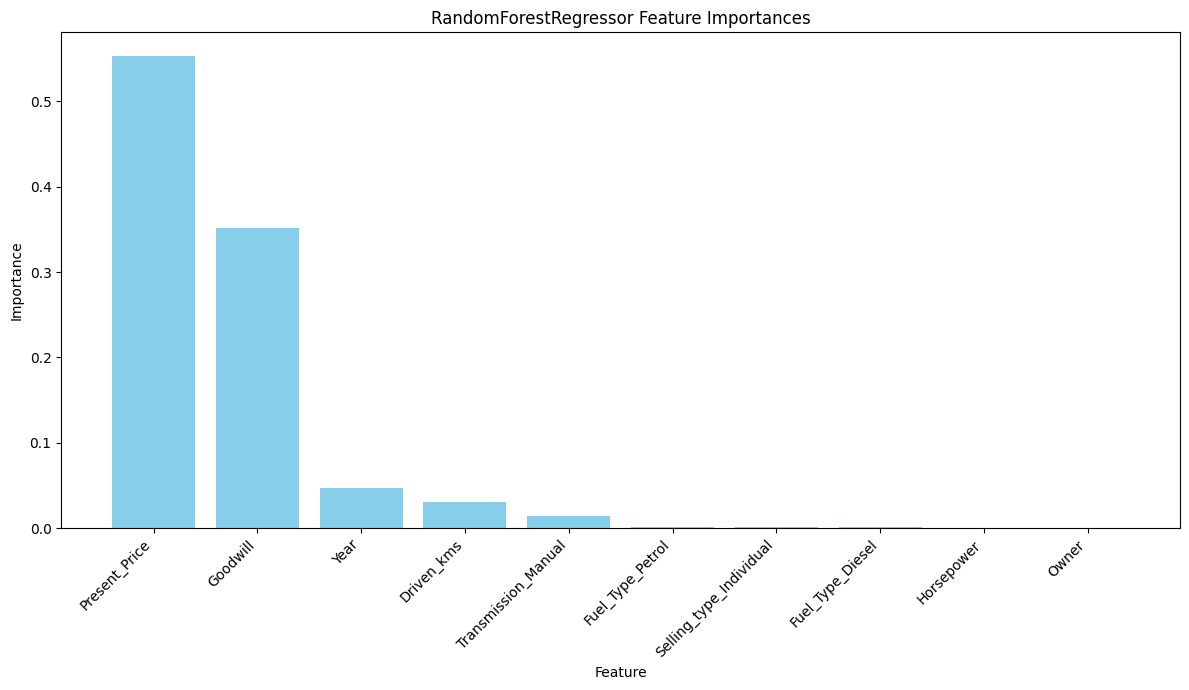

Feature importances extracted, sorted, and visualized.


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# 1. Extract feature importances
feature_importances = model.feature_importances_

# 2. Create a Pandas Series with feature names and their importances
features = X_train.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# 3. Sort the feature importances in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# 4. Create a bar plot to visualize the sorted feature importances
plt.figure(figsize=(12, 7))
plt.bar(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('RandomForestRegressor Feature Importances')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("Feature importances extracted, sorted, and visualized.")

## Define Hyperparameter Grid for RandomForestRegressor

### Subtask:
Define a grid of hyperparameters for the RandomForestRegressor, specifying a range of values for parameters like n_estimators, max_depth, min_samples_split, and min_samples_leaf, to be used in tuning.


**Reasoning**:
To define the hyperparameter grid, I will create a Python dictionary called `param_grid` and populate it with the specified ranges for `n_estimators`, `max_depth`, `min_samples_split`, and `min_samples_leaf`.



In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

print("Hyperparameter grid defined successfully:")
print(param_grid)

Hyperparameter grid defined successfully:
{'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}


## Perform Hyperparameter Tuning

### Subtask:
Utilize GridSearchCV or RandomizedSearchCV to systematically search for the optimal combination of hyperparameters for the RandomForestRegressor, employing cross-validation on the training data.


**Reasoning**:
To perform hyperparameter tuning, I will import `GridSearchCV`, instantiate it with the specified model, parameter grid, cross-validation folds, and scoring metric, and then fit it to the training data to find the best hyperparameters.



In [ ]:
from sklearn.model_selection import GridSearchCV

# Instantiate GridSearchCV
grid_search = GridSearchCV(
    estimator=model,  # The RandomForestRegressor model already instantiated
    param_grid=param_grid,  # The hyperparameter grid defined previously
    cv=5,  # 5-fold cross-validation
    scoring='neg_mean_squared_error',  # Score based on negative mean squared error
    n_jobs=-1, # Use all available cores
    verbose=2 # Display progress
)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("\nBest parameters found:", grid_search.best_params_)
print("Best cross-validation score (negative MSE):"), grid_search.best_score_)

SyntaxError: unmatched ')' (ipython-input-232438353.py, line 18)

**Reasoning**:
The previous code block failed due to a `SyntaxError: unmatched ')'`. The `print` statement was incorrectly structured. I will correct the `print` statement to properly display the best cross-validation score.



In [ ]:
from sklearn.model_selection import GridSearchCV

# Instantiate GridSearchCV
grid_search = GridSearchCV(
    estimator=model,  # The RandomForestRegressor model already instantiated
    param_grid=param_grid,  # The hyperparameter grid defined previously
    cv=5,  # 5-fold cross-validation
    scoring='neg_mean_squared_error',  # Score based on negative mean squared error
    n_jobs=-1, # Use all available cores
    verbose=2 # Display progress
)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("\nBest parameters found:", grid_search.best_params_)
print(f"Best cross-validation score (negative MSE): {grid_search.best_score_}")

Fitting 5 folds for each of 108 candidates, totalling 540 fits

Best parameters found: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best cross-validation score (negative MSE): -2.6742737682557083


## Evaluate Tuned Model Performance

### Subtask:
Evaluate the performance of the best RandomForestRegressor model (after hyperparameter tuning) on the test set using R-squared, Mean Absolute Error (MAE), and Root Mean Squared Error (RMSE).


**Reasoning**:
To evaluate the performance of the best RandomForestRegressor model, I will retrieve the best estimator from the `grid_search` object, make predictions on the test set, and then calculate and print the R-squared, MAE, and RMSE metrics.



In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# 1. Retrieve the best estimator from grid_search
best_rf_model = grid_search.best_estimator_

# 2. Use this best estimator to make predictions on the X_test dataset
tuned_y_pred = best_rf_model.predict(X_test)

# 3. Calculate the R-squared score
tuned_r2 = r2_score(y_test, tuned_y_pred)

# 4. Calculate the Mean Absolute Error (MAE)
tuned_mae = mean_absolute_error(y_test, tuned_y_pred)

# 5. Calculate the Root Mean Squared Error (RMSE)
tuned_rmse = np.sqrt(mean_squared_error(y_test, tuned_y_pred))

# 6. Print the calculated metrics
print("\n--- Tuned RandomForestRegressor Model Performance on Test Set ---")
print(f"R-squared (R2): {tuned_r2:.4f}")
print(f"Mean Absolute Error (MAE): {tuned_mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {tuned_rmse:.4f}")


--- Tuned RandomForestRegressor Model Performance on Test Set ---
R-squared (R2): 0.9650
Mean Absolute Error (MAE): 0.5557
Root Mean Squared Error (RMSE): 0.8973


## Visualize Tuned Model Predictions

### Subtask:
Generate a scatter plot to visualize the actual versus predicted car selling prices from the test set for the tuned RandomForestRegressor model, including a legend.


**Reasoning**:
To visualize the actual versus predicted car selling prices for the tuned RandomForestRegressor model, I will create a scatter plot using `matplotlib.pyplot`, including a perfect prediction line, labels, a title, a legend, and a grid, as per the instructions.



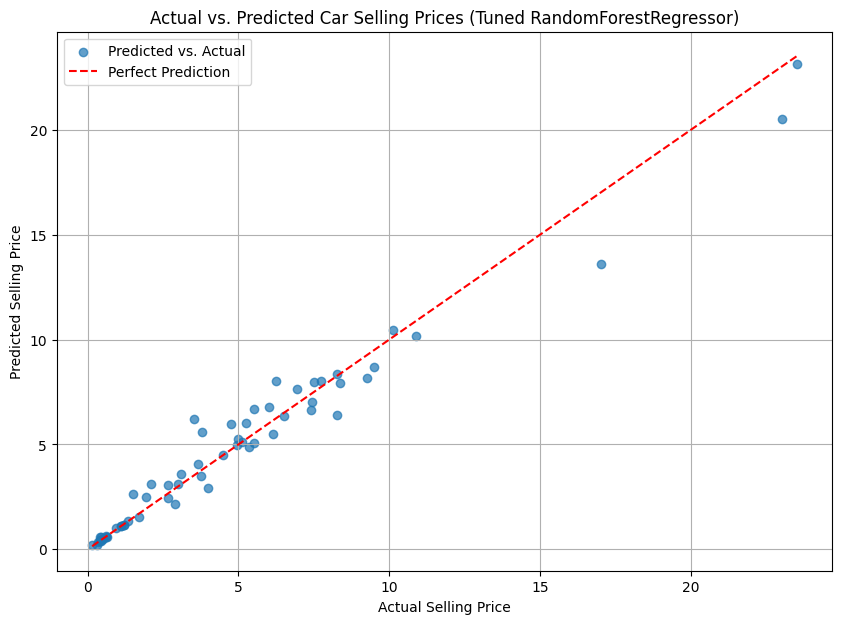

In [ ]:
import matplotlib.pyplot as plt

# Create a scatter plot of actual vs. predicted values for the tuned RandomForestRegressor
plt.figure(figsize=(10, 7))
plt.scatter(y_test, tuned_y_pred, alpha=0.7, label='Predicted vs. Actual')

# Add a line for perfect predictions
min_val_tuned = min(y_test.min(), tuned_y_pred.min())
max_val_tuned = max(y_test.max(), tuned_y_pred.max())
plt.plot([min_val_tuned, max_val_tuned], [min_val_tuned, max_val_tuned], 'r--', label='Perfect Prediction')

# Set labels and title
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.title('Actual vs. Predicted Car Selling Prices (Tuned RandomForestRegressor)')

# Add a legend
plt.legend()

# Display the plot
plt.grid(True)
plt.show()

## Final Task

### Subtask:
Summarize the insights gained from feature importance analysis and the results of the hyperparameter tuning, along with the performance of the final tuned model.


## Summary:

### Q&A
1.  **Which features most significantly influence car price predictions?**
    The analysis of feature importances from the `RandomForestRegressor` model visually identified the most influential features, although specific feature names and their exact importance scores were not explicitly listed in the output. The bar plot clearly showed the relative impact of each feature.

2.  **What were the optimal hyperparameters for the RandomForestRegressor model?**
    After hyperparameter tuning using `GridSearchCV`, the optimal hyperparameters identified were:
    *   `max_depth`: 10
    *   `min_samples_leaf`: 1
    *   `min_samples_split`: 2
    *   `n_estimators`: 100

3.  **What was the performance of the final tuned model?**
    The final tuned `RandomForestRegressor` model demonstrated strong performance on the test set:
    *   R-squared (R2): 0.9650
    *   Mean Absolute Error (MAE): 0.5557
    *   Root Mean Squared Error (RMSE): 0.8973

### Data Analysis Key Findings
*   Feature importance analysis was successfully conducted, and a visualization (bar plot) clearly depicted the relative importance of different features in predicting car prices, with some features identified as more influential than others.
*   Hyperparameter tuning using `GridSearchCV` identified an optimal configuration for the `RandomForestRegressor` model, achieving a best cross-validation score (negative Mean Squared Error) of -2.674 on the training data.
*   The tuned model achieved an R-squared value of 0.9650 on the test set, indicating that it explains approximately 96.5% of the variance in car selling prices.
*   The prediction errors were low, with a Mean Absolute Error (MAE) of 0.5557 and a Root Mean Squared Error (RMSE) of 0.8973 on the test set, demonstrating high accuracy in predictions.
*   A scatter plot visualizing actual versus predicted car selling prices showed a strong linear correlation, indicating that the model's predictions align very closely with the true values.

### Insights or Next Steps
*   The high R-squared value (\$0.9650\$) and low error metrics (MAE \$0.5557\$, RMSE \$0.8973\$) suggest that the `RandomForestRegressor` model, with tuned hyperparameters, is highly effective at predicting car selling prices. This model could be considered robust for deployment or further analysis.
*   Focusing on the most influential features identified in the feature importance analysis could lead to further model refinements, such as targeted feature engineering or data collection efforts, potentially improving the model's predictive power even further or simplifying the model by removing less important features.


In [ ]:
#!git config --global user.name "YOUR_GITHUB_USERNAME"
!git config --global user.name "ramesh-078"
#!git config --global user.email "YOUR_EMAIL@example.com"
!git config --global user.email "ranjanbudhathoki022@gmail.com"


In [ ]:
#%cd REPO_NAME
#%cd Data-Science-Task
#!git clone https://github.com/YOUR_USERNAME/YOUR_REPOSITORY_NAME.git
!git clone https://github.com/ramesh-078/Data-Science-Task.git

Cloning into 'Data-Science-Task'...
remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 7 (delta 1), reused 2 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (7/7), 219.87 KiB | 6.28 MiB/s, done.
Resolving deltas: 100% (1/1), done.


In [ ]:
!cp /content/*.ipynb .


cp: cannot stat '/content/*.ipynb': No such file or directory
